In [1]:
from dask.distributed import Client

In [2]:
client = Client(threads_per_worker=1)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42935 instead
  warnings.warn(


In [3]:
client

<Client: 'tcp://127.0.0.1:34999' processes=12 threads=12, memory=46.00 GiB>

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
cd /g/data/tm70/as2285/om3-scripts/expts_manager/r_25march/fast

/g/data/tm70/as2285/om3-scripts/expts_manager/r_25march/fast


In [6]:
! grep ndtd ice_in

    ndtd = 1


In [7]:
! grep cf ice_in

In [8]:
! grep DT archive/output000/MOM_parameter_doc.all

DT = 675.0                      !   [s]
                                ! be an integer fraction of the forcing time-step (DT_FORCING in ocean-only mode
DT_THERM = 675.0                !   [s] default = 675.0
                                ! The thermodynamic and tracer advection time step. Ideally DT_THERM should be
                                ! an integer multiple of DT and less than the forcing or coupling time-step,
                                ! unless THERMO_SPANS_COUPLING is true, in which case DT_THERM can be an integer
                                ! multiple of the coupling timestep.  By default DT_THERM is set to DT.
                                ! that is less than or equal to DT_THERM.
DTBT_RESET_PERIOD = 0.0         !   [s] default = 675.0
                                ! The period between recalculations of DTBT (if DTBT <= 0). If DTBT_RESET_PERIOD
                                ! is negative, DTBT is set based only on information available at
             

In [9]:
grid_ds = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc')

In [10]:
grid_ds=grid_ds.rename({'xt_ocean':'ni', 'yt_ocean':'nj'})

In [11]:
inst_files_1 = ! ls archive/output*/access-om3.cice_inst.1901-03-*.nc

In [12]:
inst_files_1

['archive/output000/access-om3.cice_inst.1901-03-26-00675.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-01350.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-02025.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-02700.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-03375.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-04050.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-04725.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-05400.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-06075.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-06750.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-07425.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-08100.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-08775.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-09450.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-10125.nc',
 'archive/output000/access-om3.cice_inst.1901-03-26-108

In [13]:
inst_ds_1 = xr.open_mfdataset(inst_files_1)

inst_ds_1['TLON']=grid_ds['geolon_t']

inst_ds_1['TLAT']=grid_ds['geolat_t']

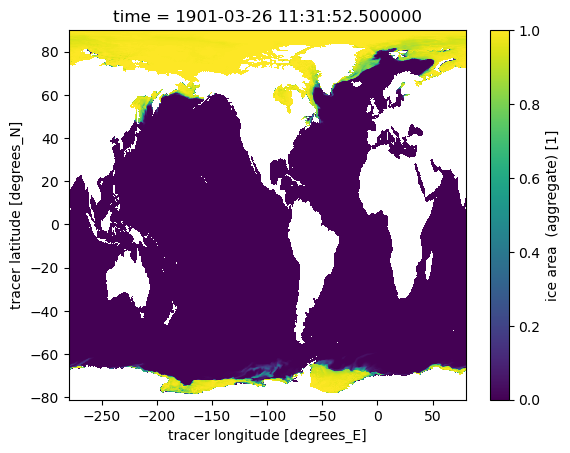

In [14]:
inst_ds_1.isel(time=61).aice_1.plot(x='geolon_t',y='geolat_t')

In [15]:
crash_point_1 = inst_ds_1.isel(ni=1068,nj=1001)


In [16]:
crash_point = crash_point_1

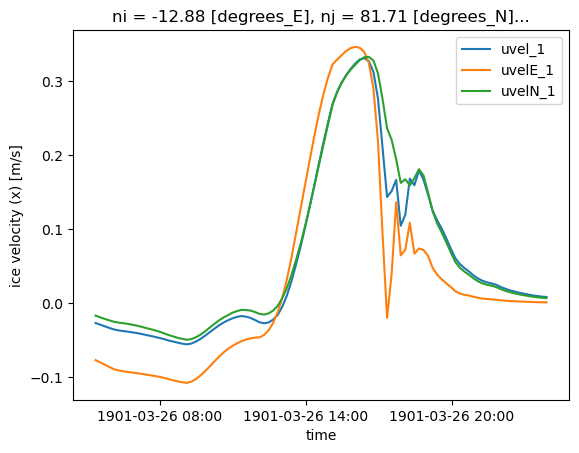

In [17]:
for v in ['uvel_1',#'vvel_1', 
          'uvelE_1', #'vvelE_1', 
          'uvelN_1', #'vvelN_1'
         ]:
    crash_point_1[v].isel(time=slice(-100,None)).plot(label=v)

plt.legend()

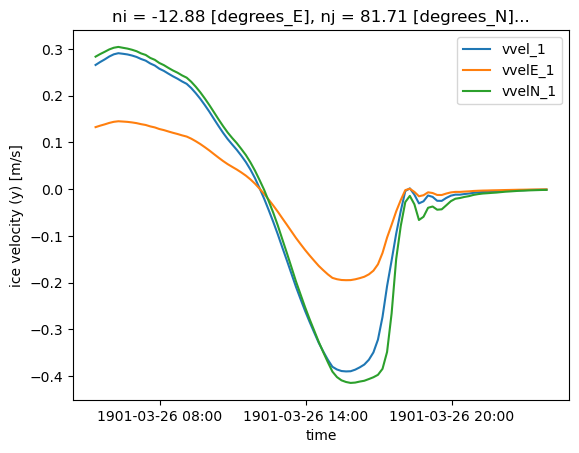

In [18]:
for v in ['vvel_1', 
          'vvelE_1', 
          'vvelN_1'
         ]:
    crash_point_1[v].isel(time=slice(-100,None)).plot(label=v)

plt.legend()

In [19]:
inst_ds = inst_ds_1

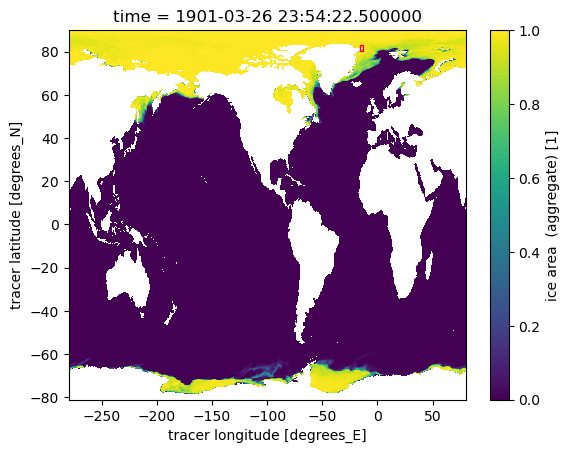

In [20]:
plt.figure()
ax = plt.subplot()

inst_ds.aice_1.isel(time=-1).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
# plt.ylim([75,85])
# plt.xlim([-20,-10])

ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='red', fill=None))
ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.1, height=0.1, color='black', fill=None))

plt.show()

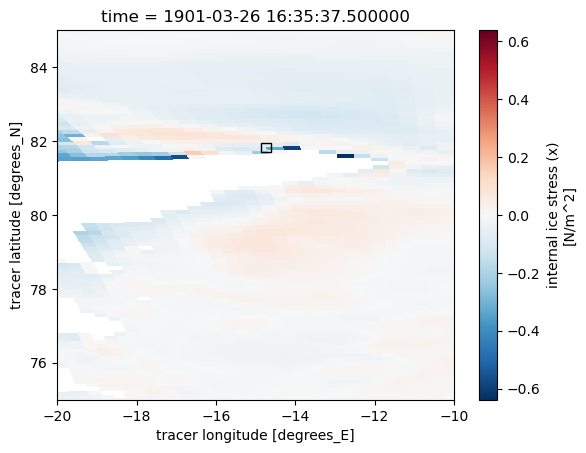

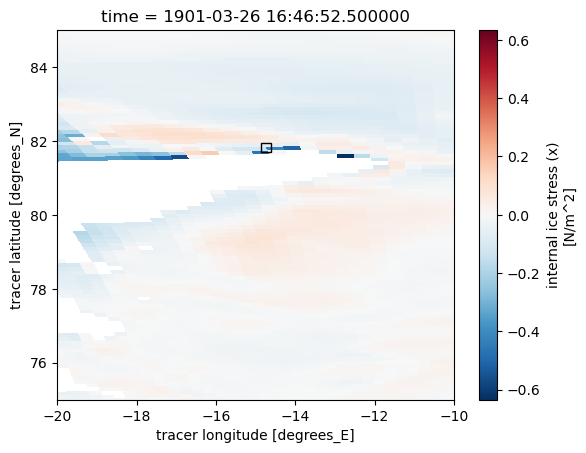

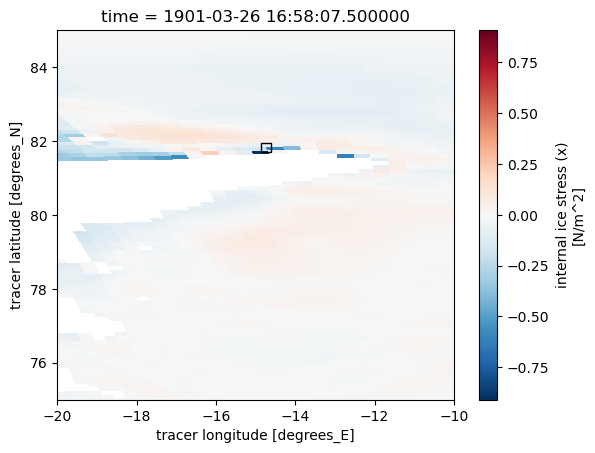

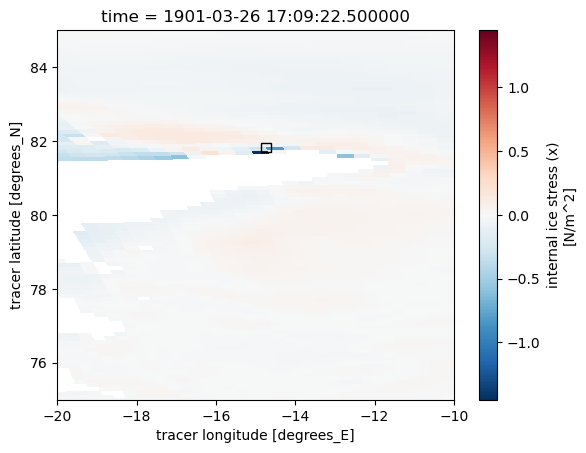

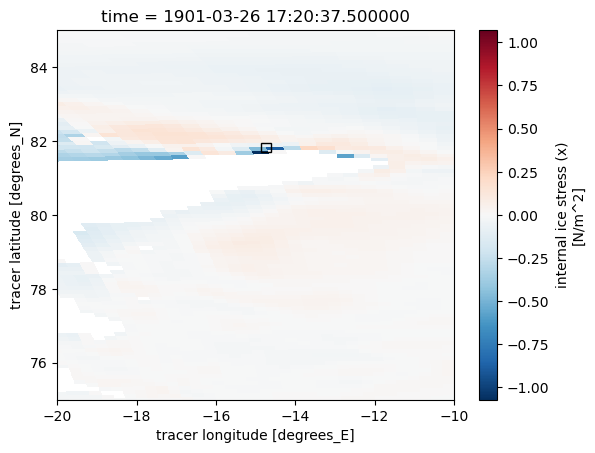

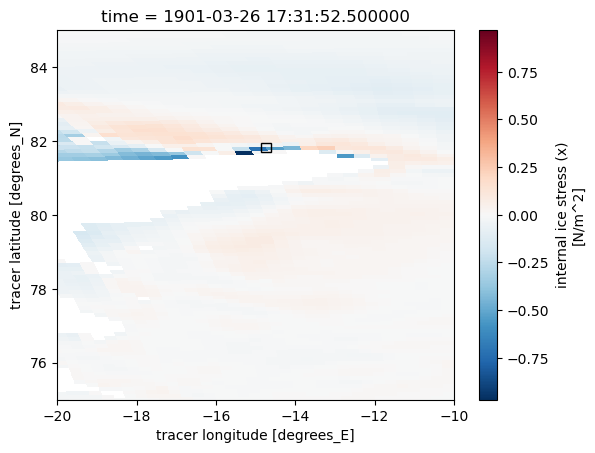

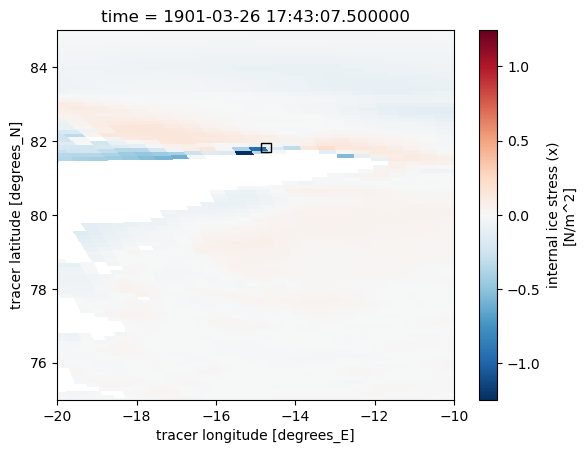

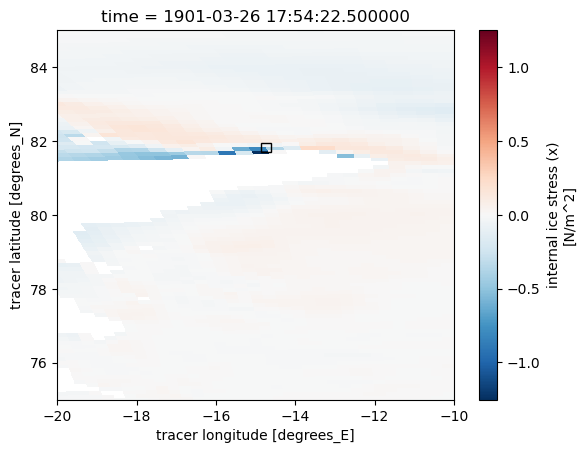

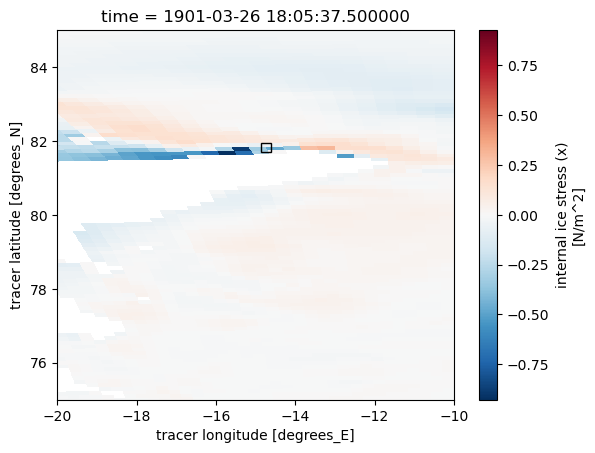

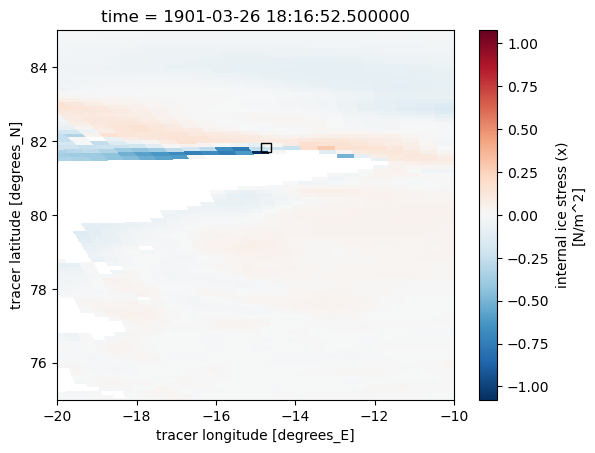

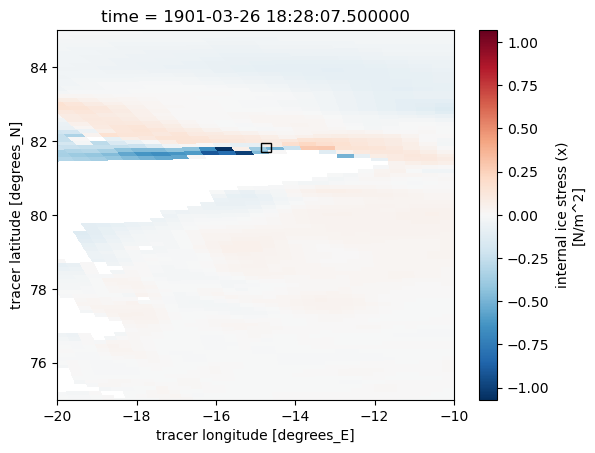

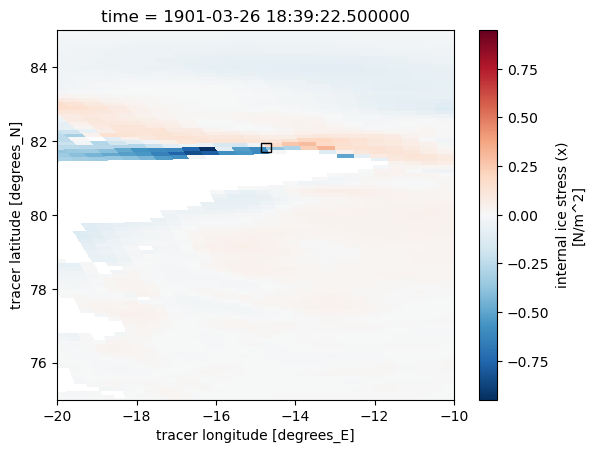

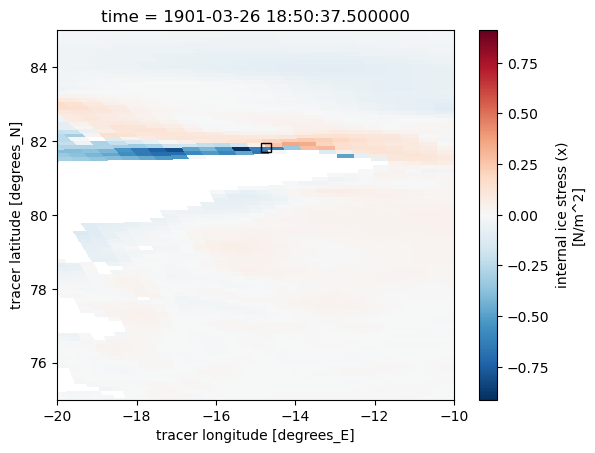

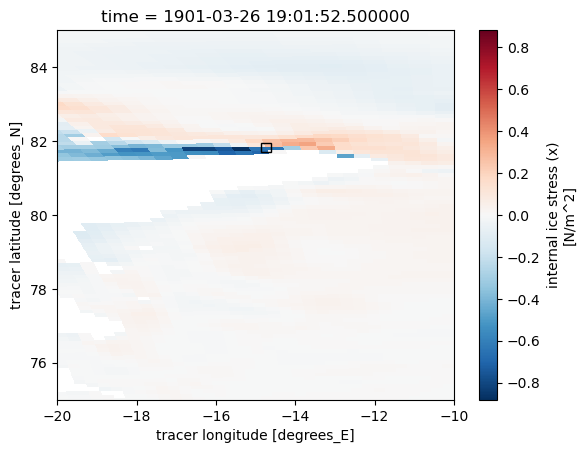

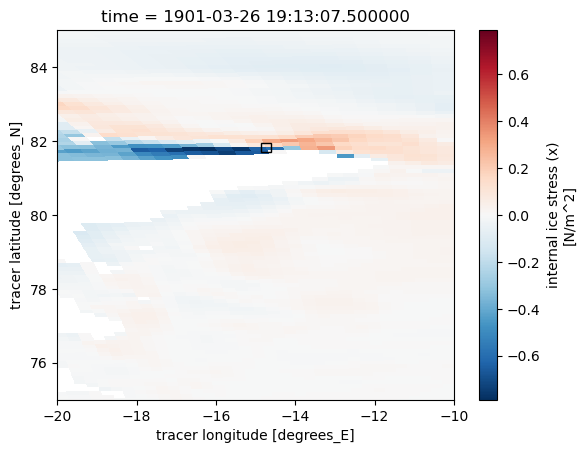

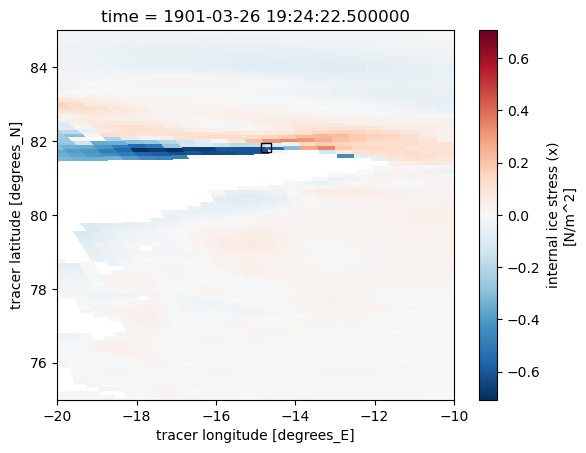

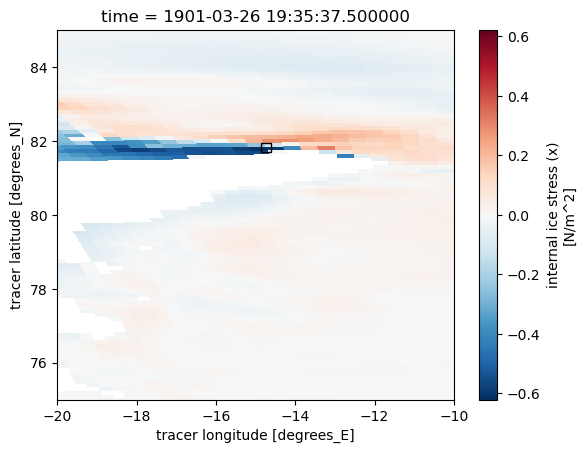

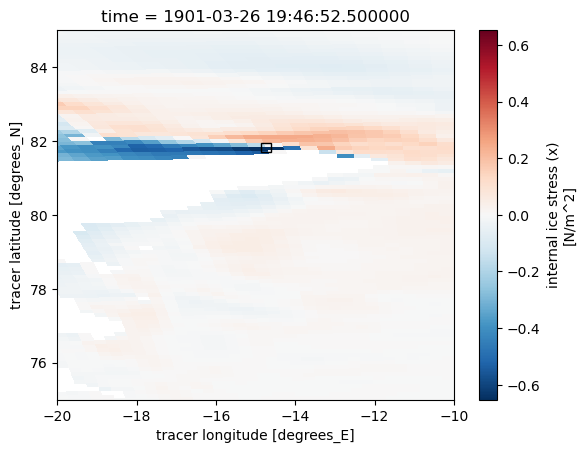

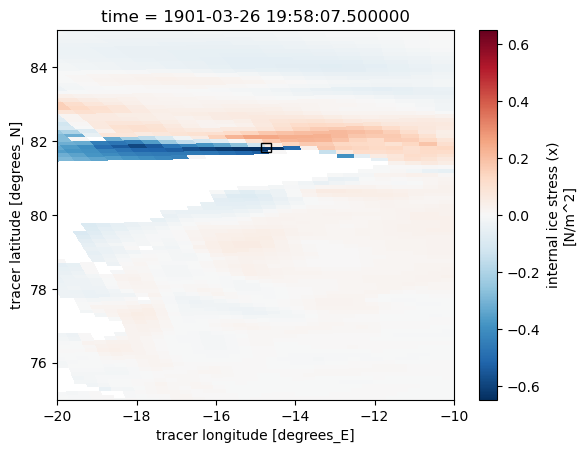

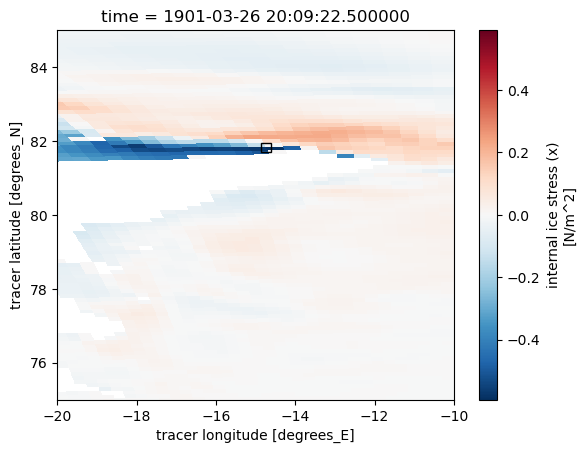

In [21]:
for t in range(-40,-20,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.strintxE_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


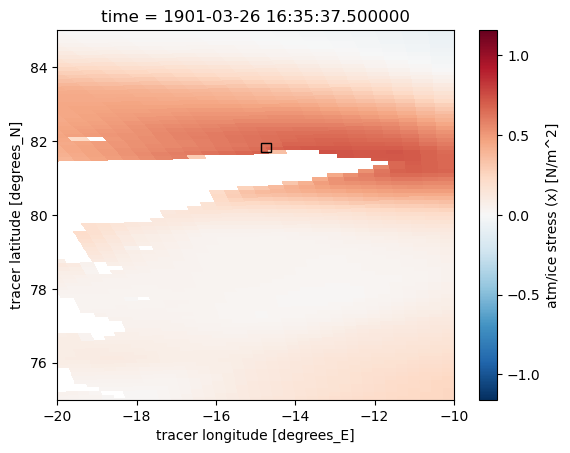

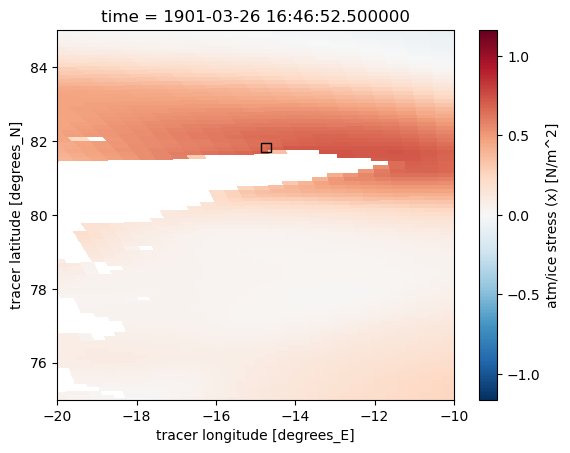

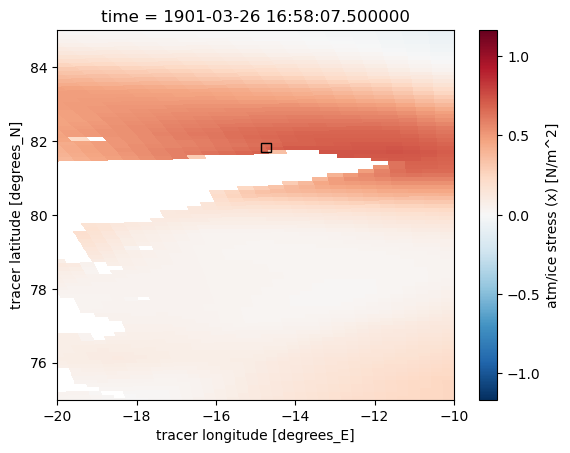

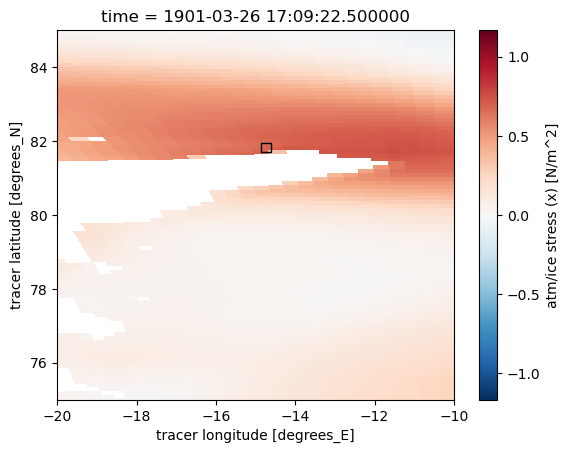

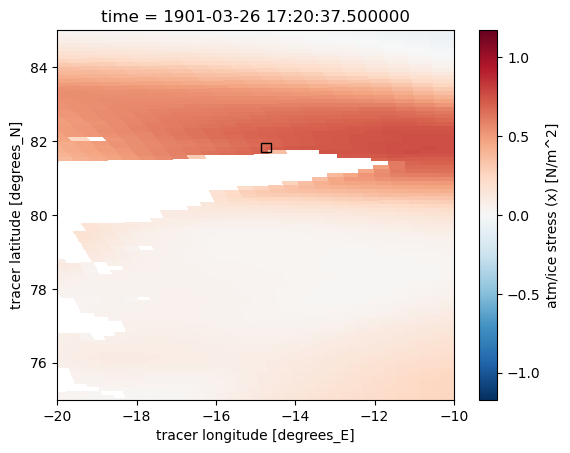

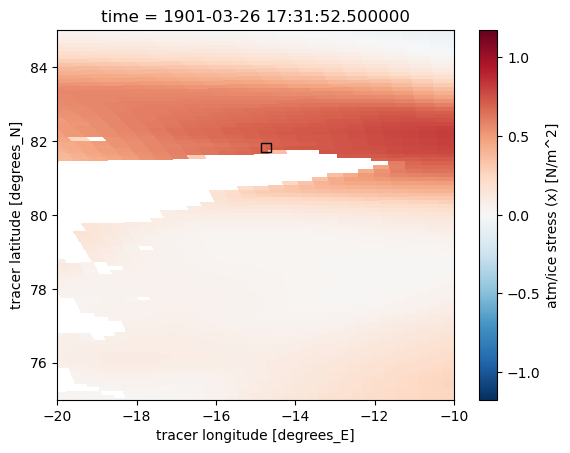

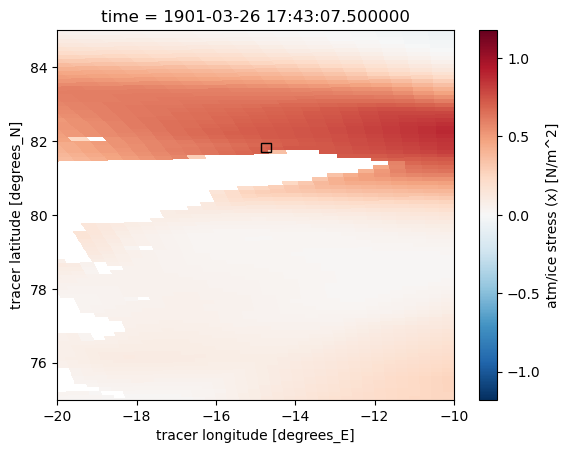

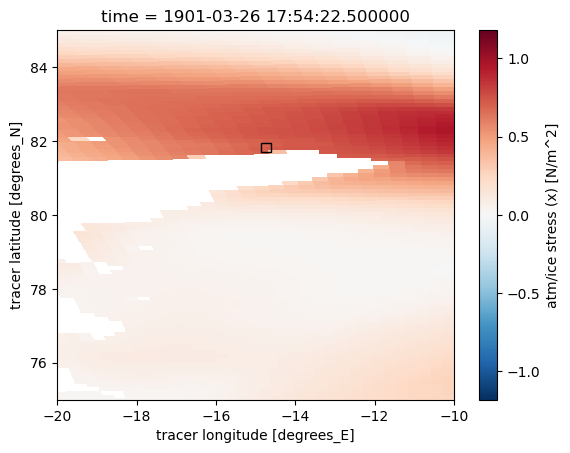

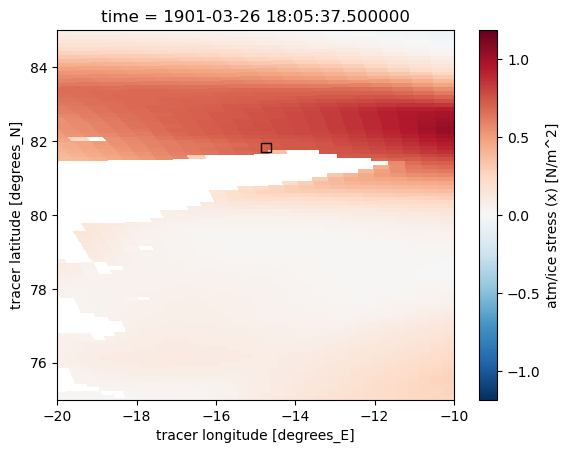

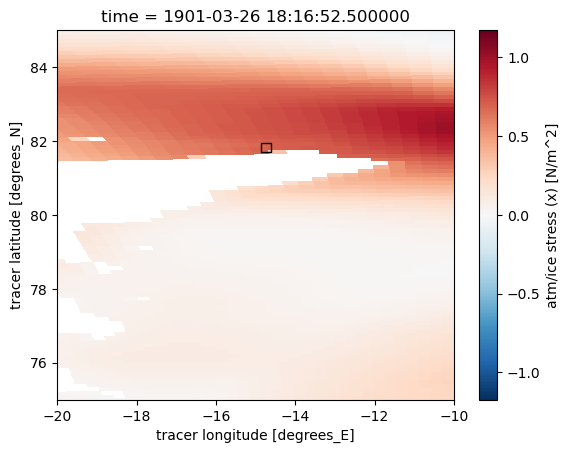

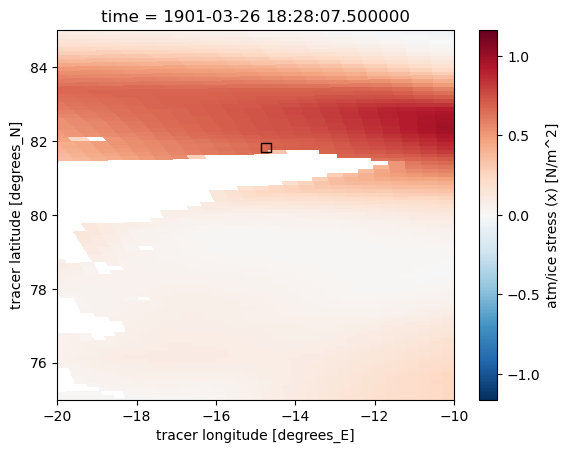

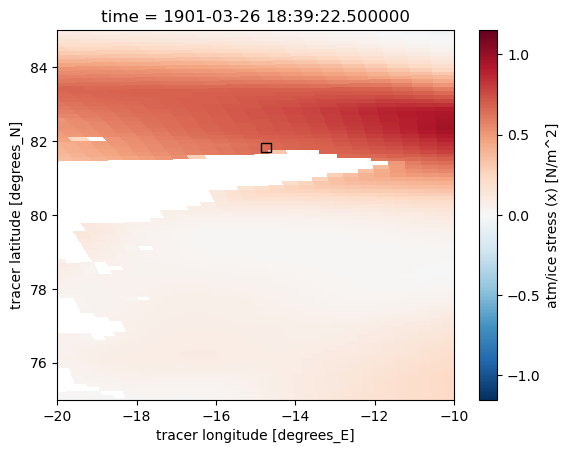

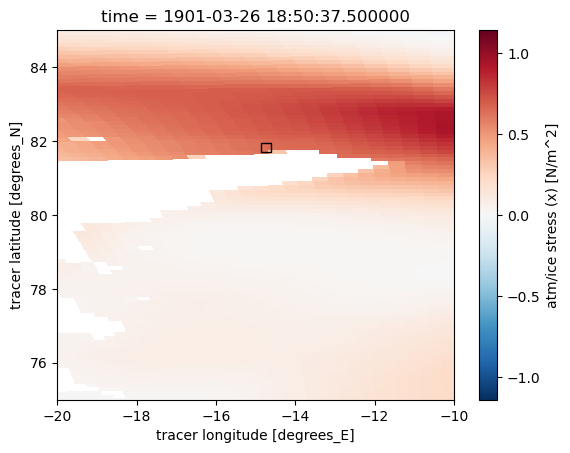

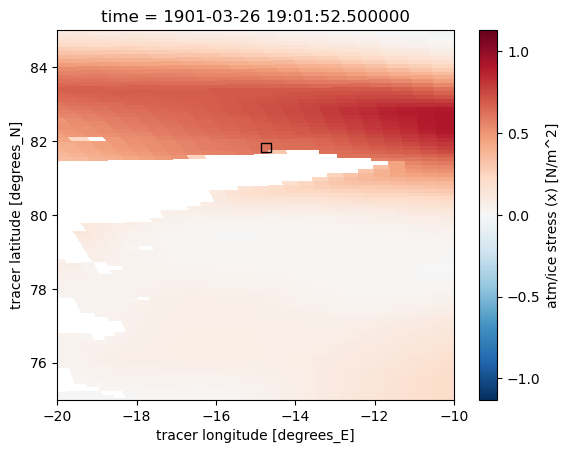

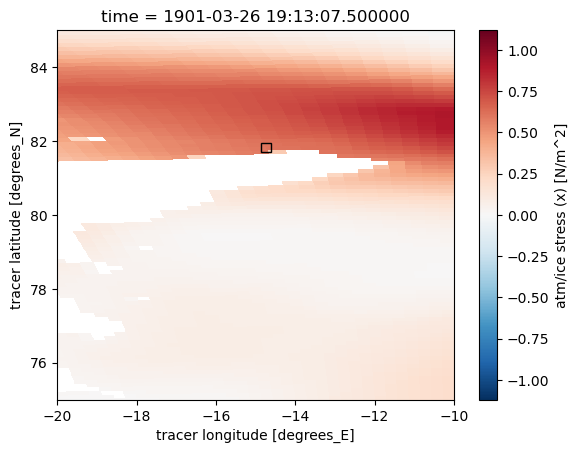

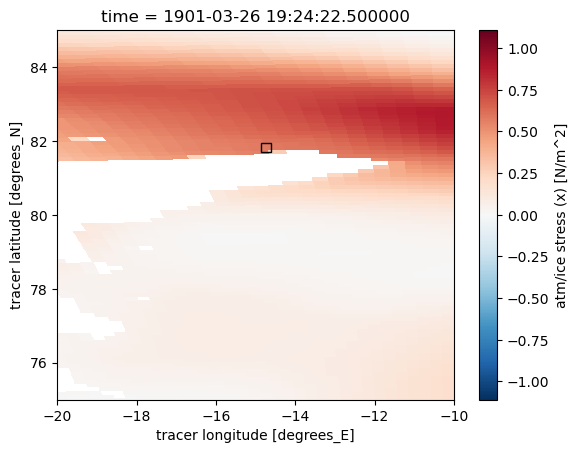

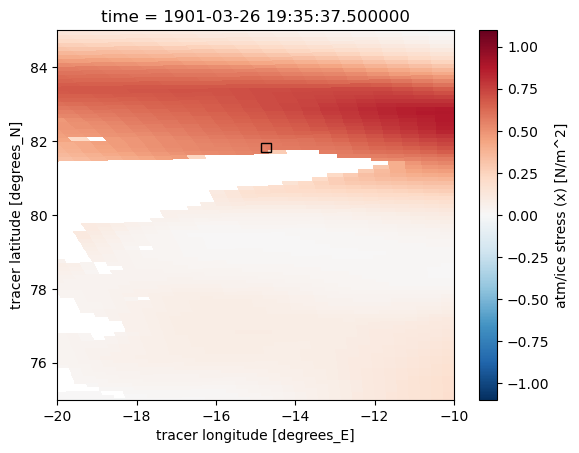

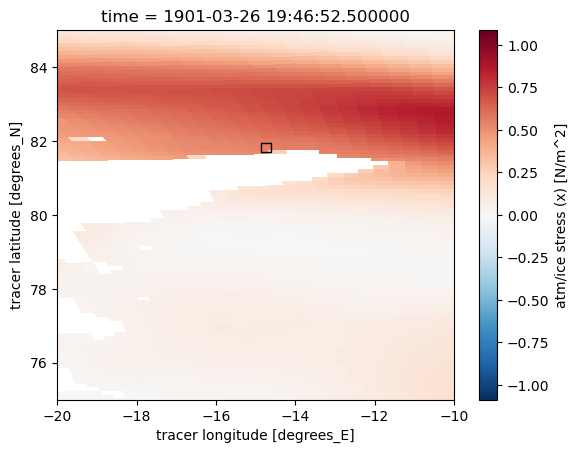

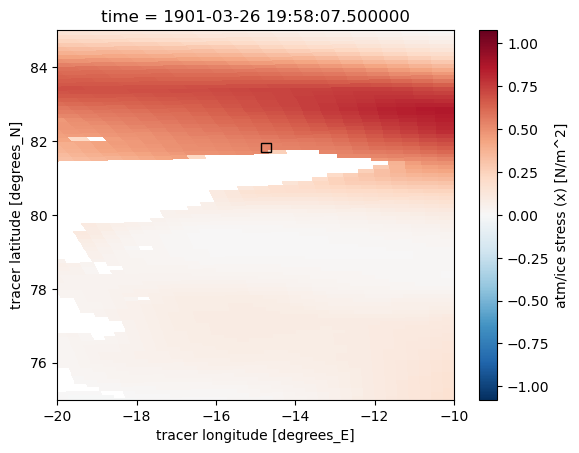

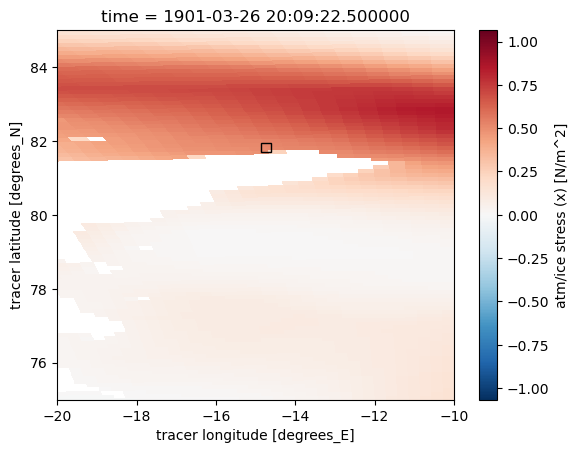

In [33]:
for t in range(-40,-20,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.strairxE_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


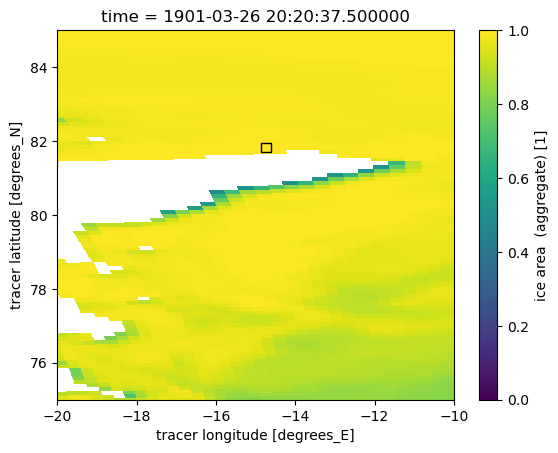

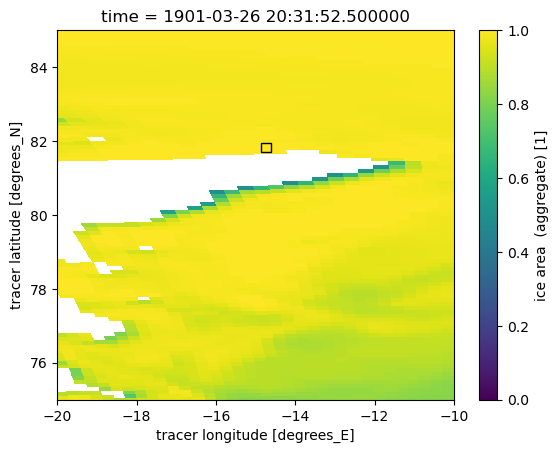

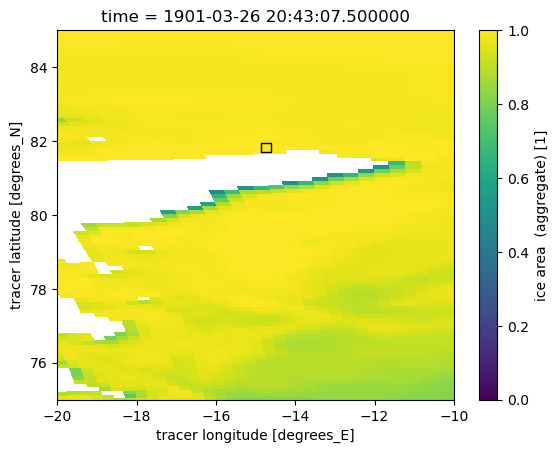

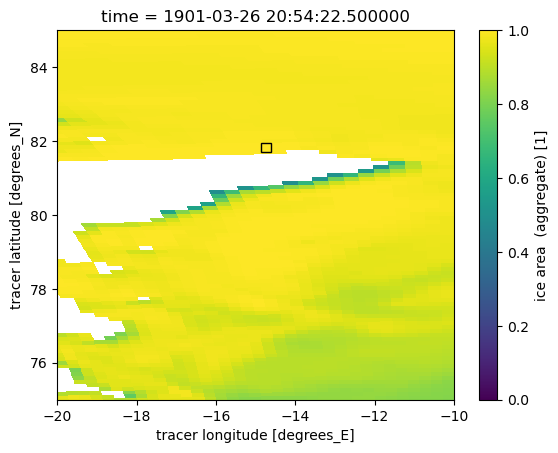

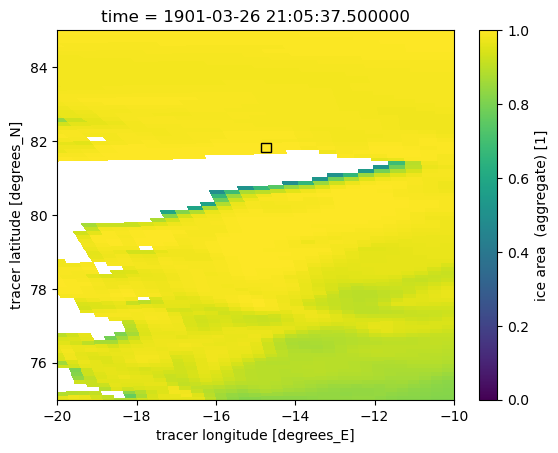

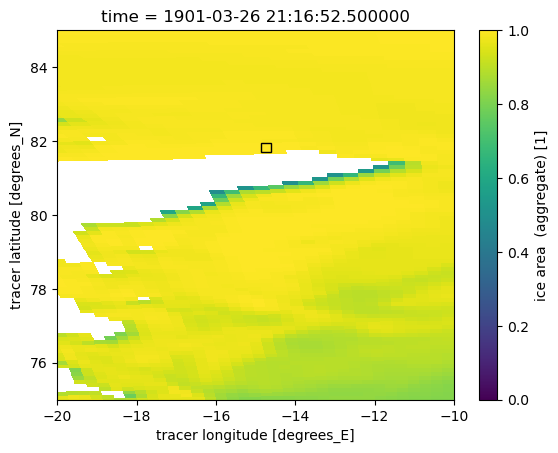

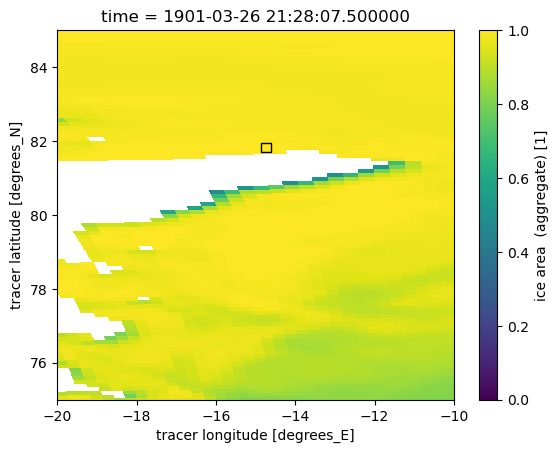

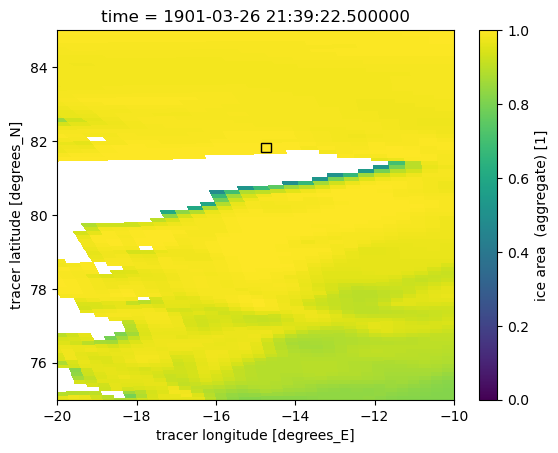

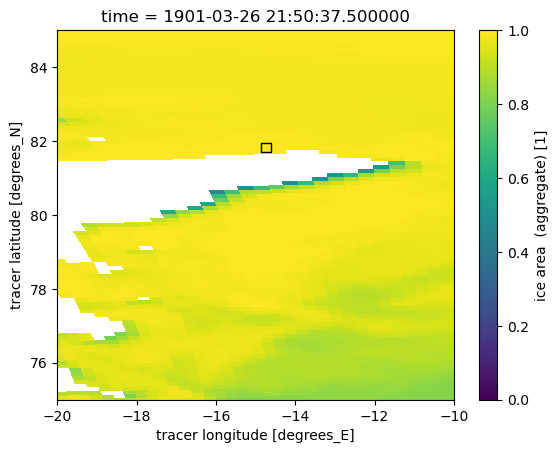

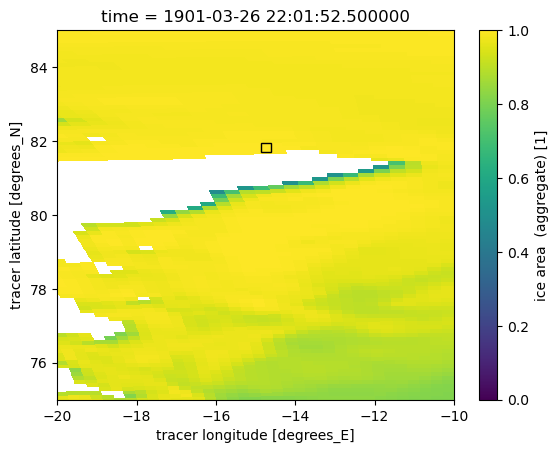

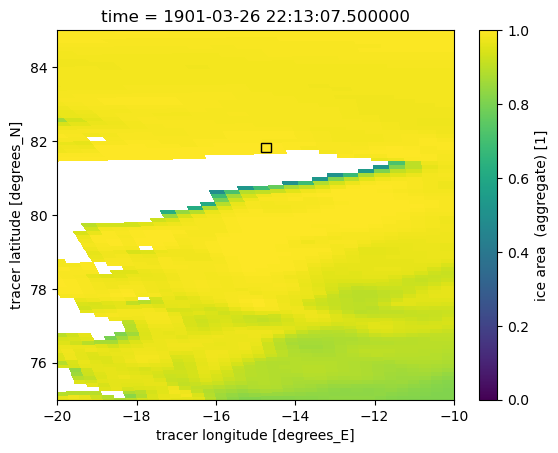

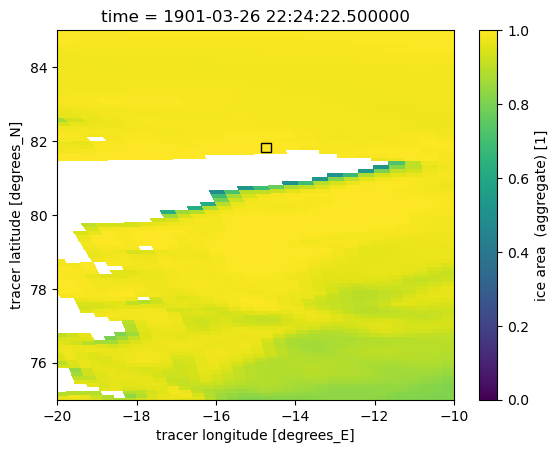

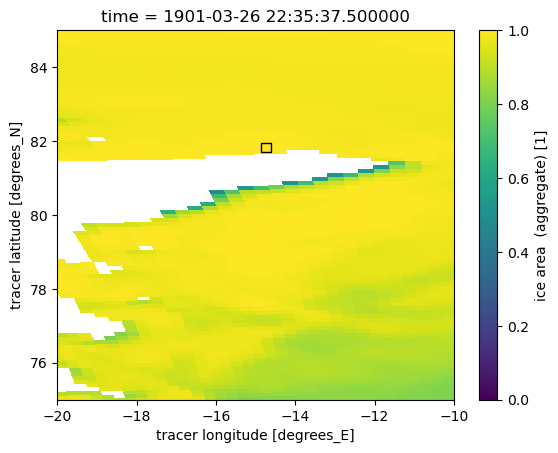

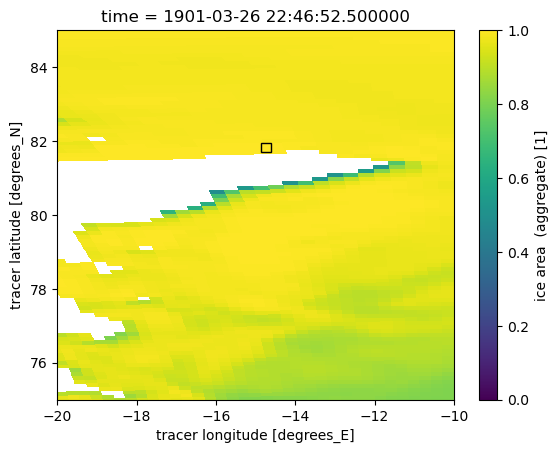

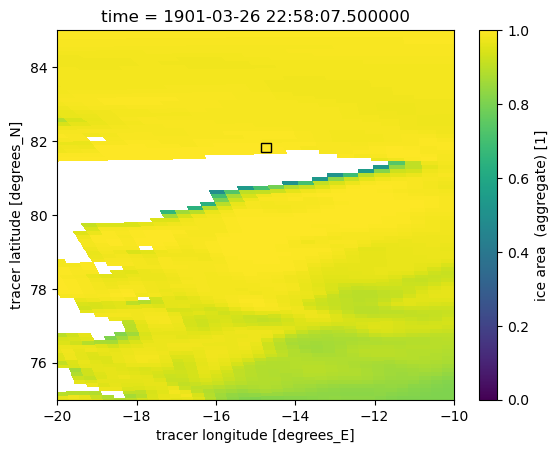

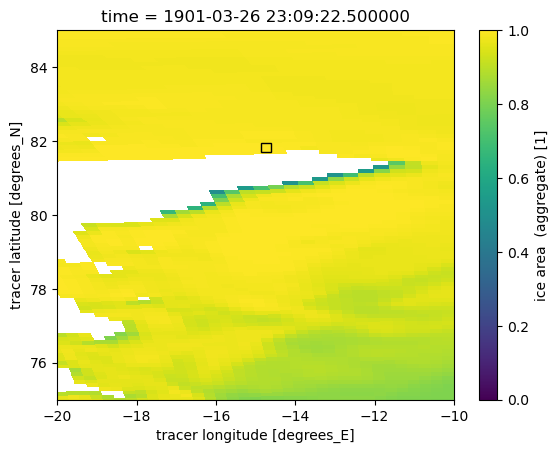

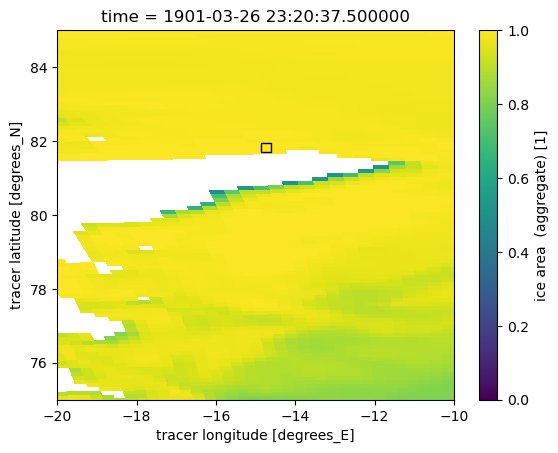

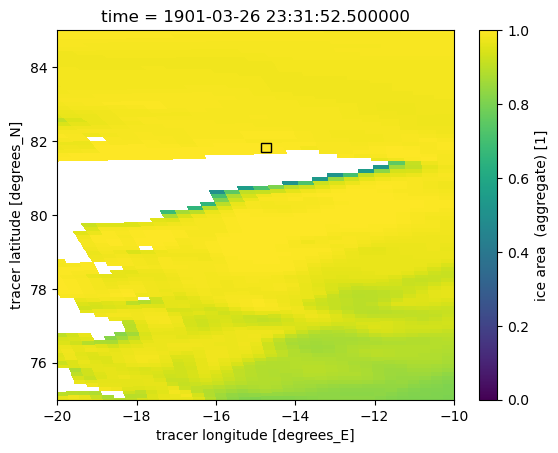

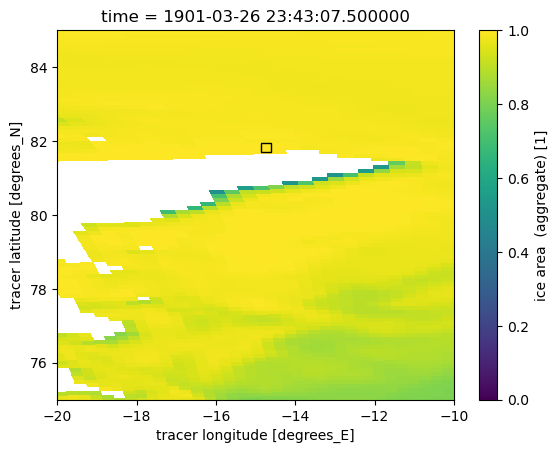

In [22]:
for t in range(-20,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.aice_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


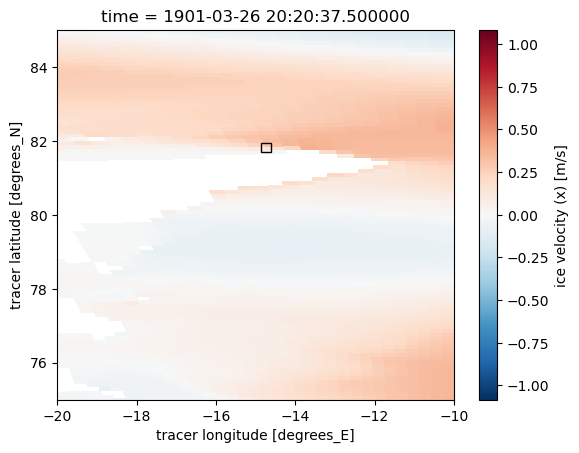

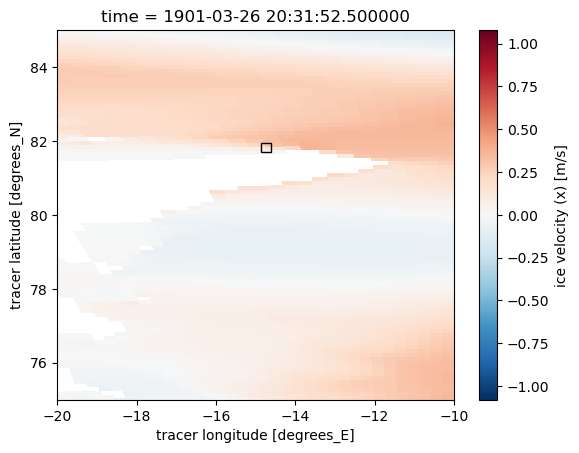

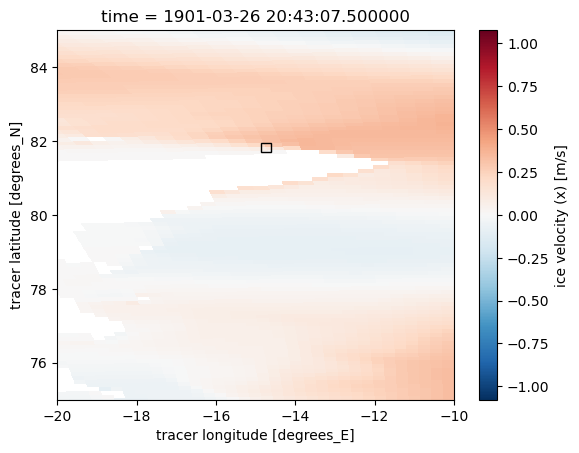

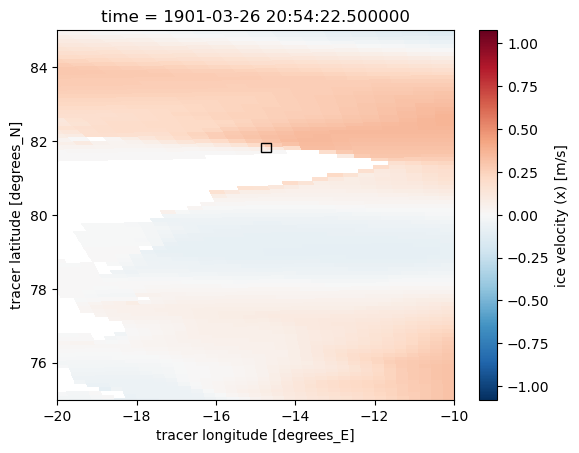

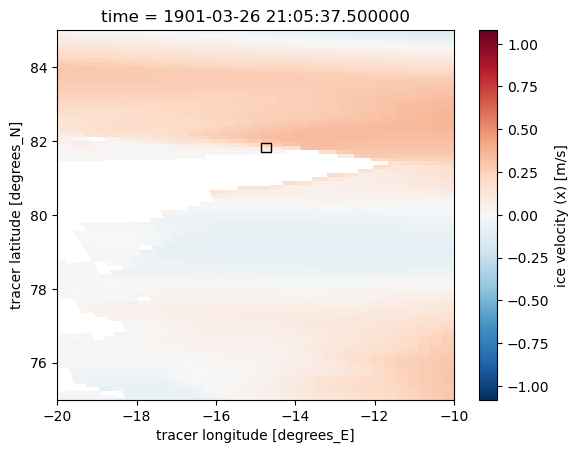

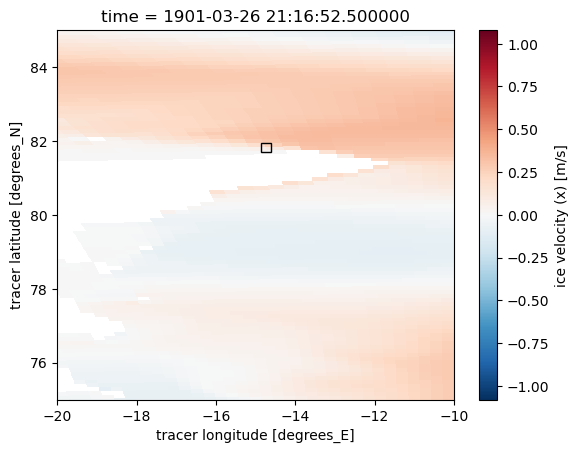

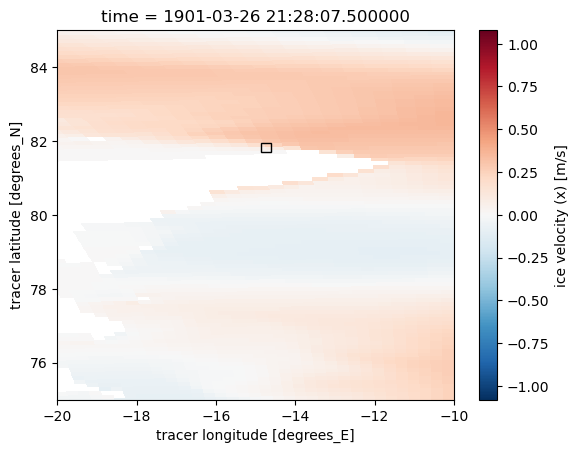

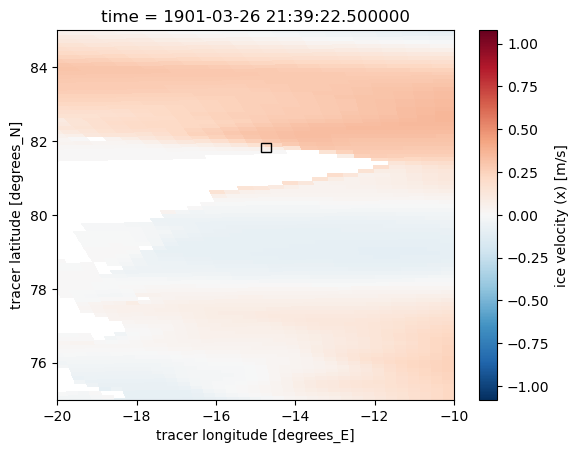

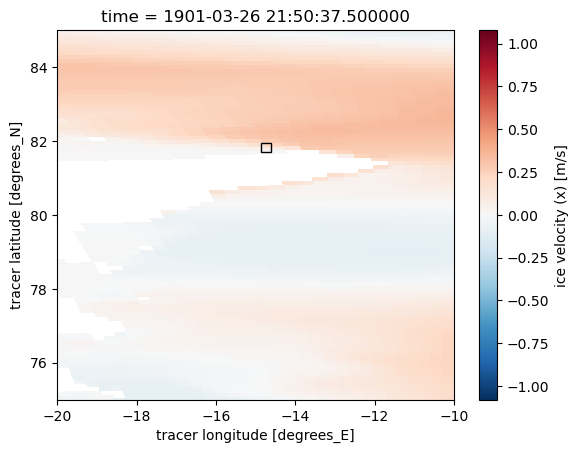

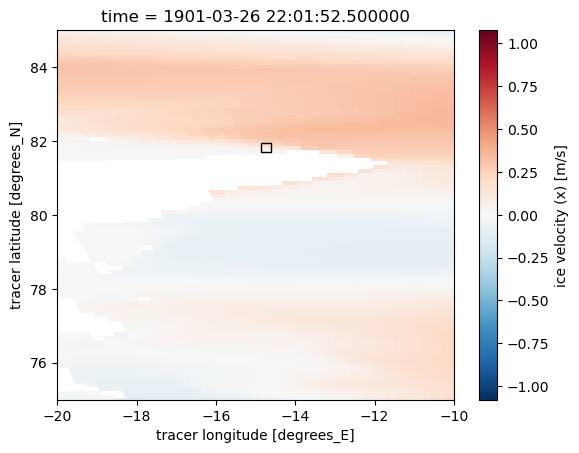

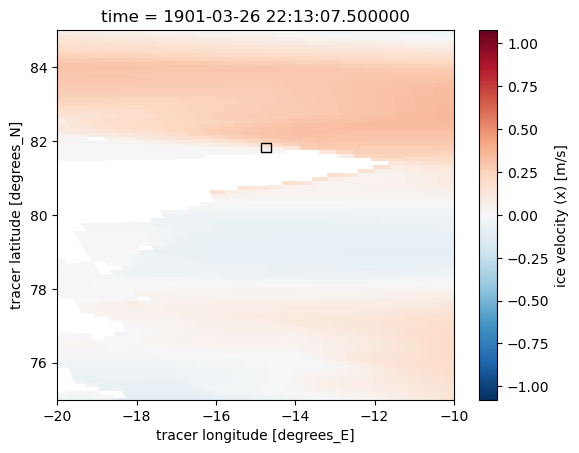

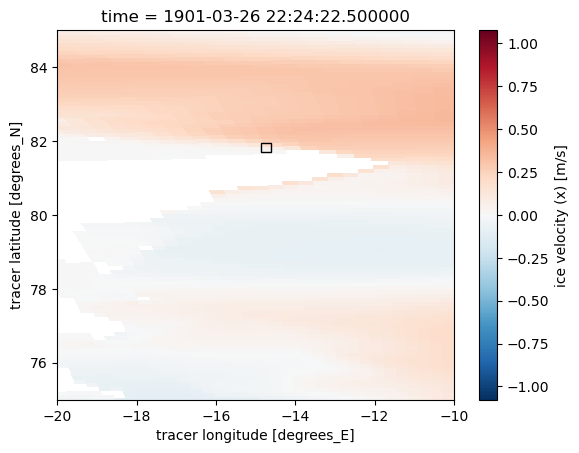

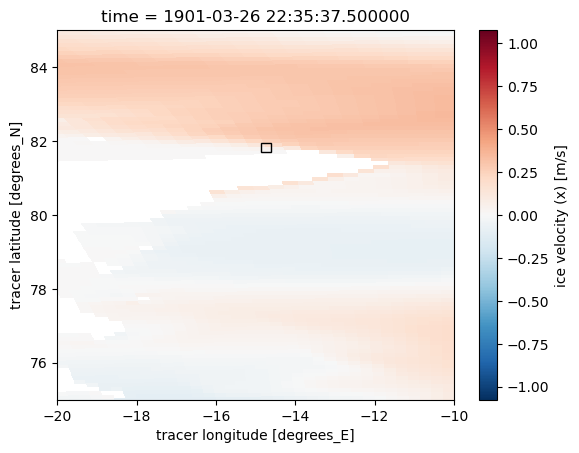

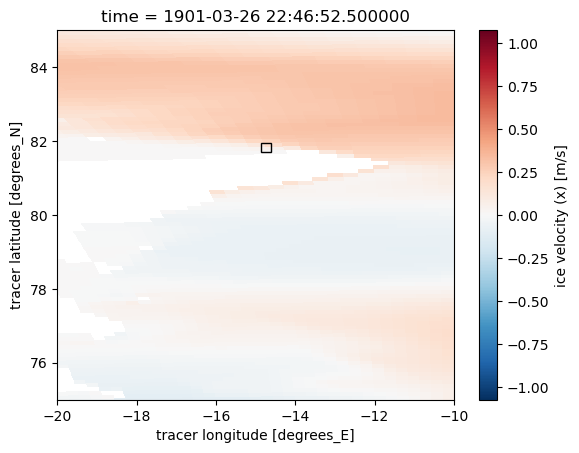

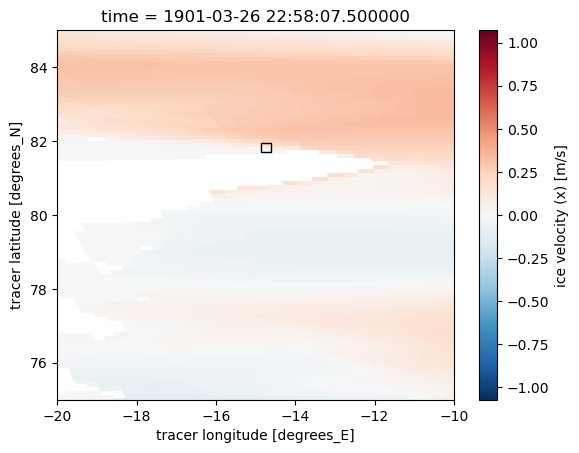

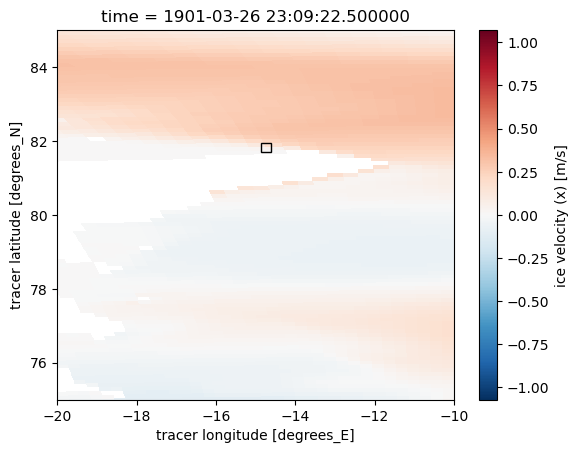

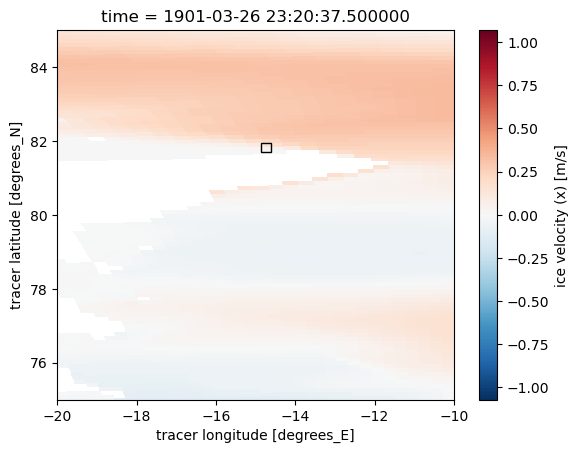

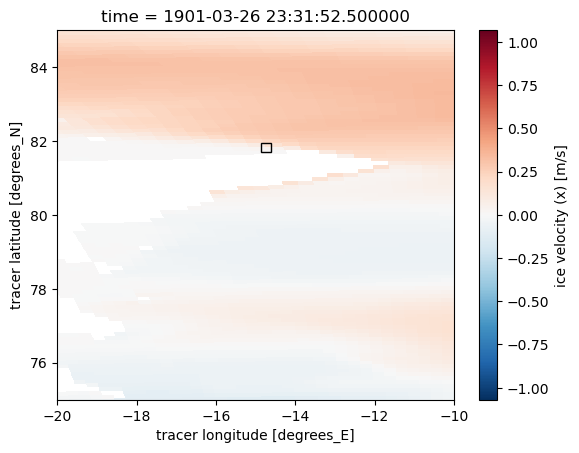

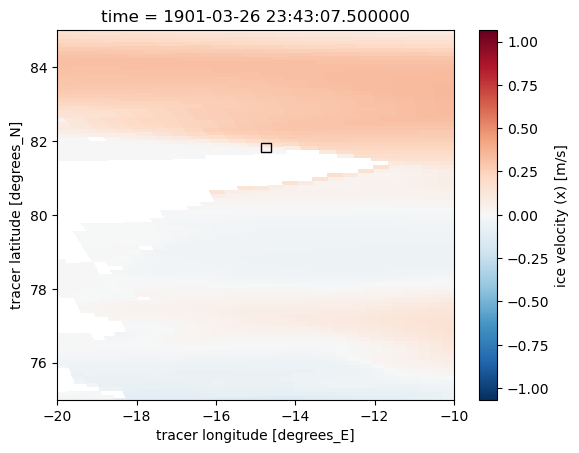

In [23]:
for t in range(-20,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.uvelE_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


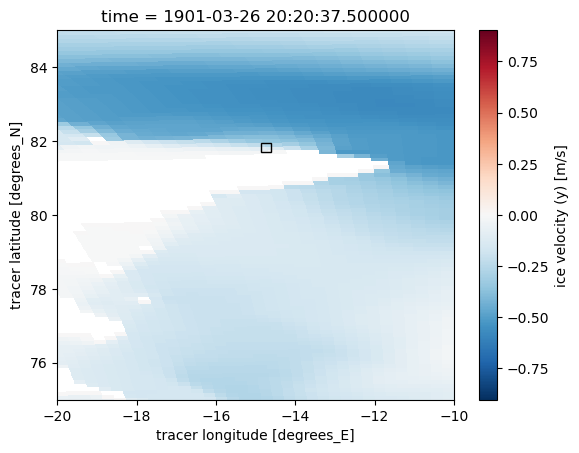

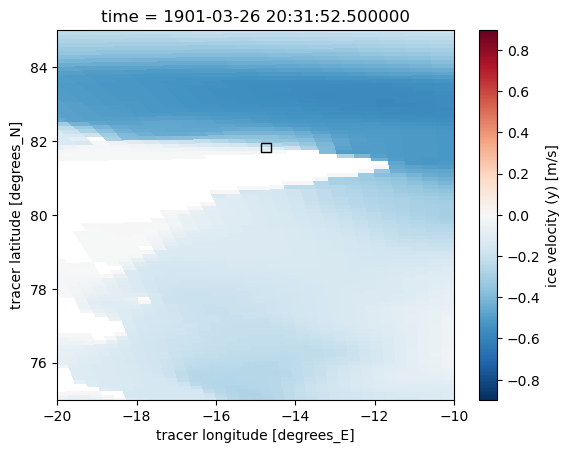

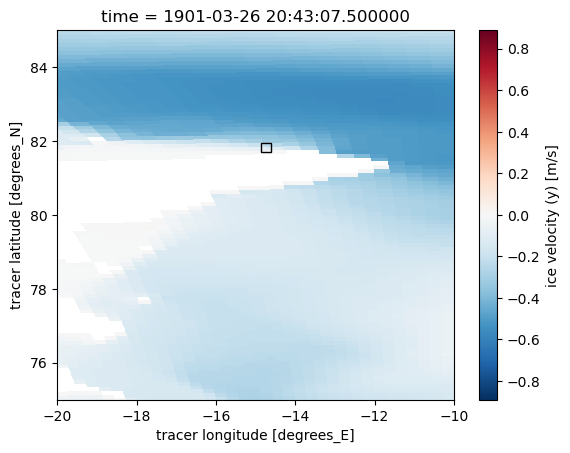

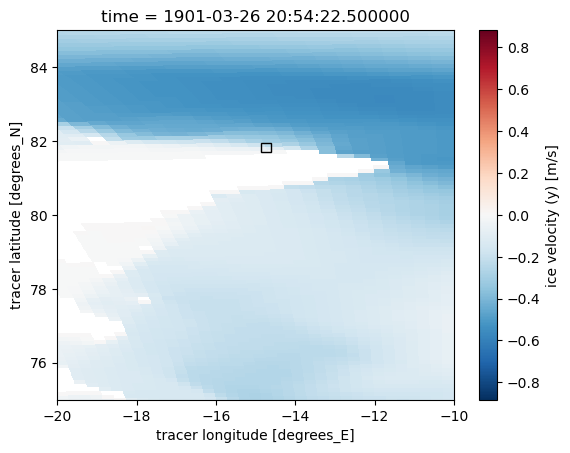

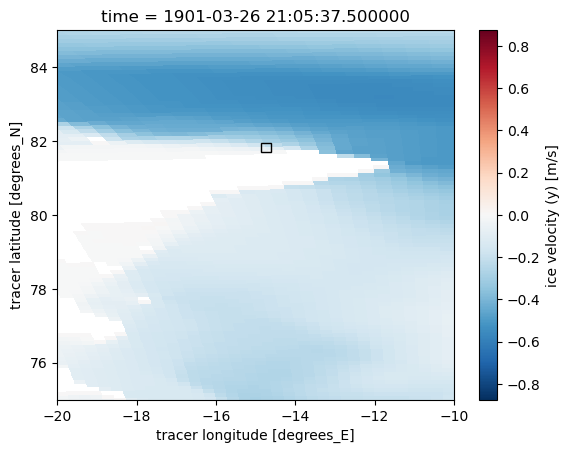

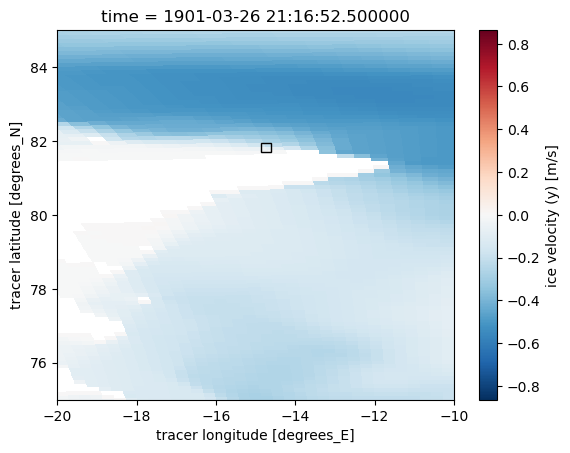

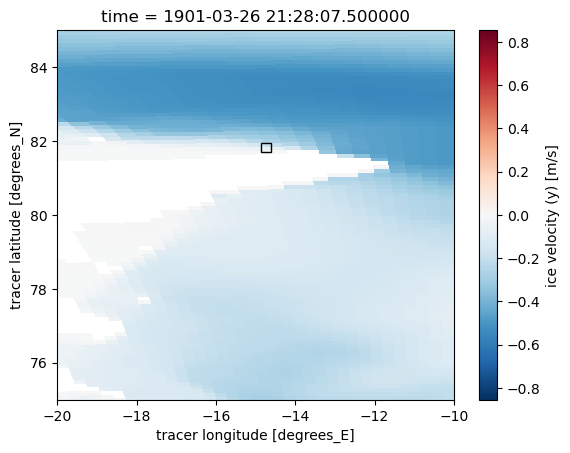

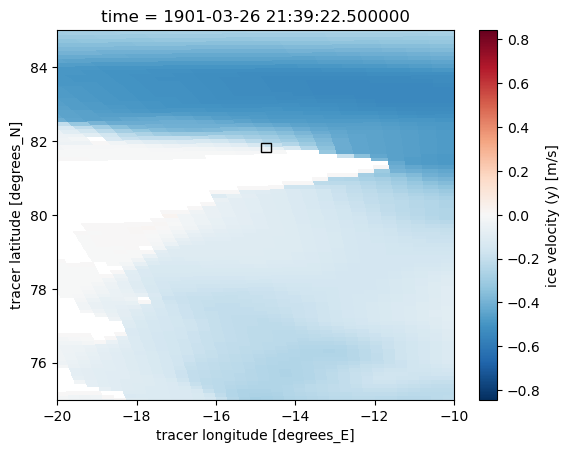

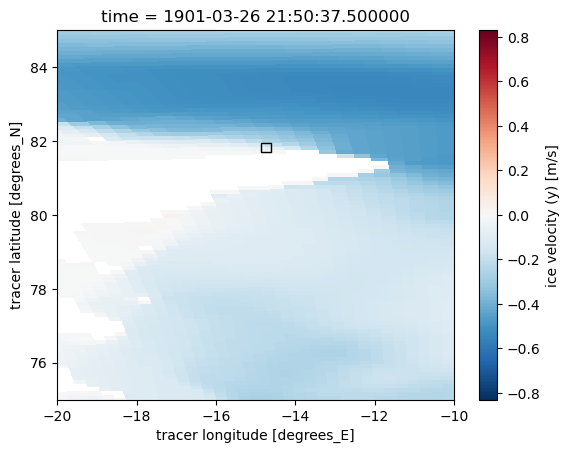

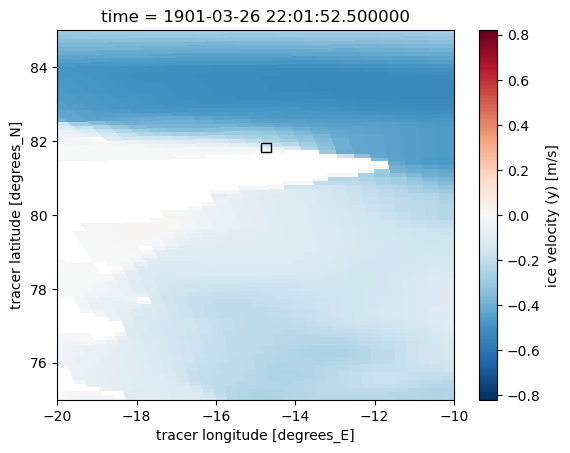

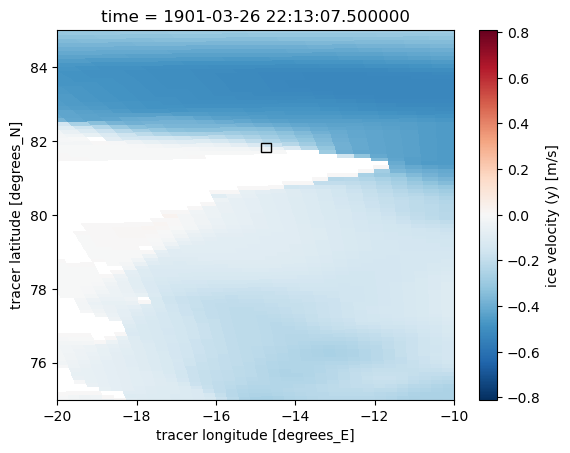

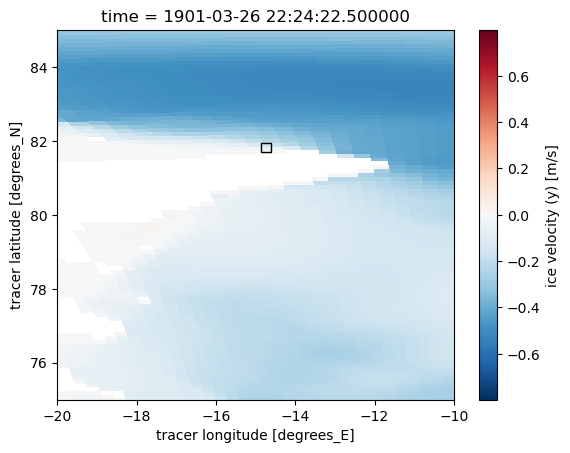

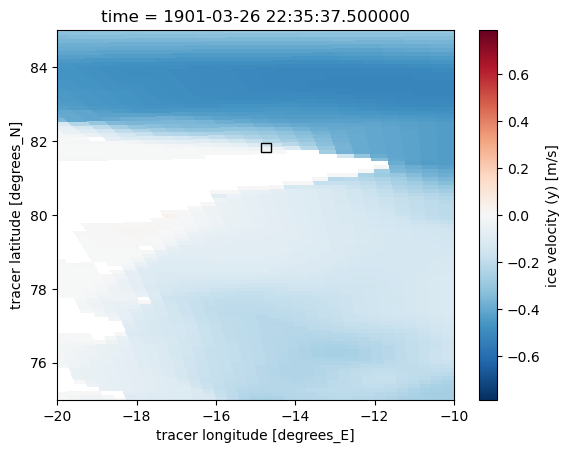

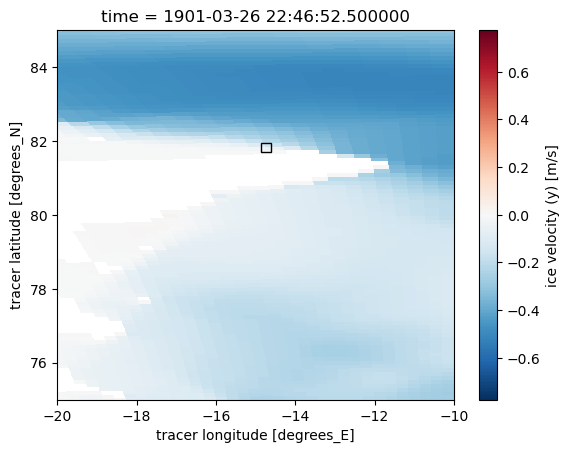

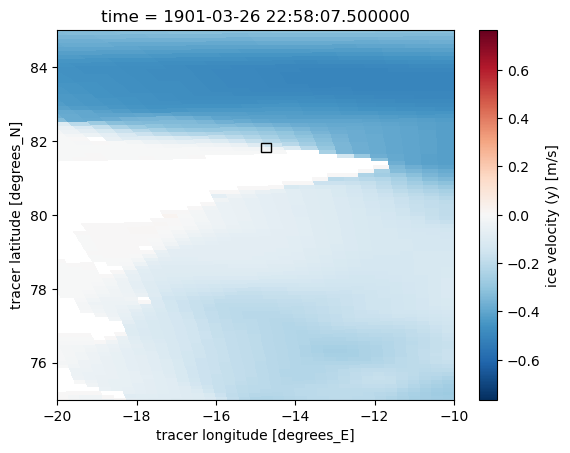

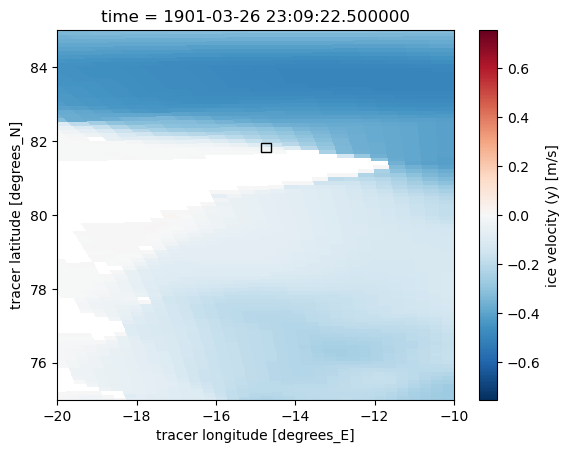

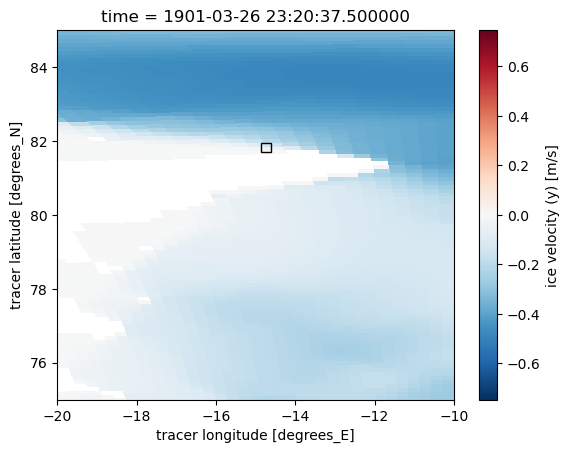

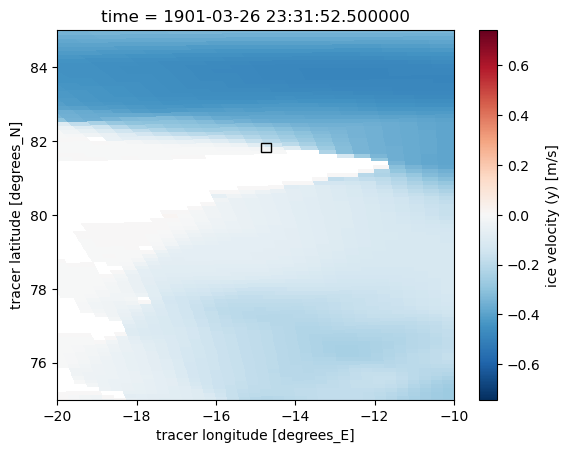

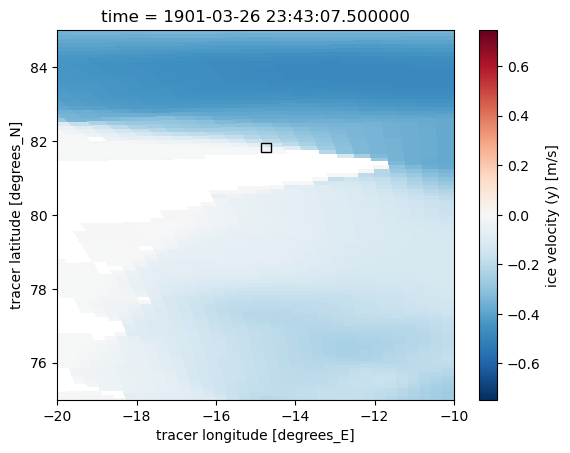

In [24]:
for t in range(-20,-1,1):
    plt.figure()
    ax = plt.subplot()
    
    inst_ds.vvelN_1.isel(time=t).plot(ax=ax, x = 'geolon_t' , y = 'geolat_t')
    plt.ylim([75,85])
    plt.xlim([-20,-10])
    
    # ax.add_patch(plt.Rectangle((-16,80.125),width=3, height=3, color='black', fill=None))
    ax.add_patch(plt.Rectangle((-14.8643879243489,81.6865092532964),width=0.25, height=0.25, color='black', fill=None))

    plt.show()


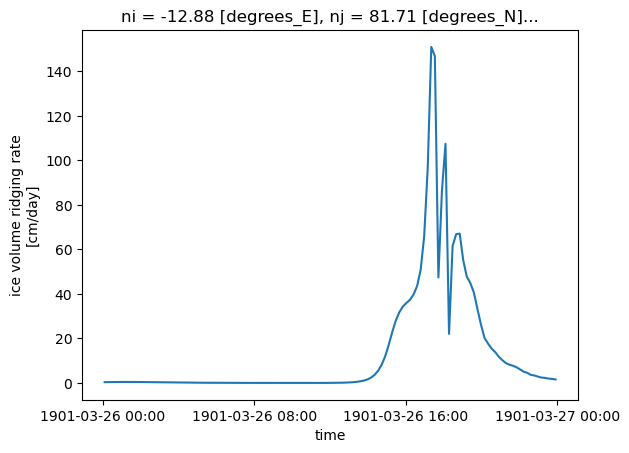

In [25]:
crash_point.dvirdgdt_1.plot()

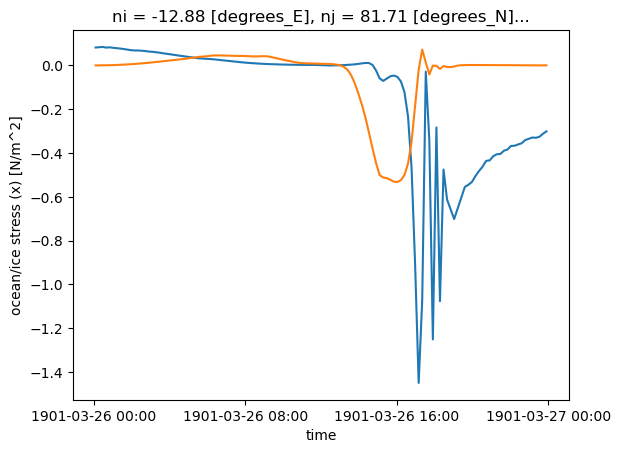

In [26]:
crash_point.strintxE_1.plot()
crash_point.strocnxE_1.plot()

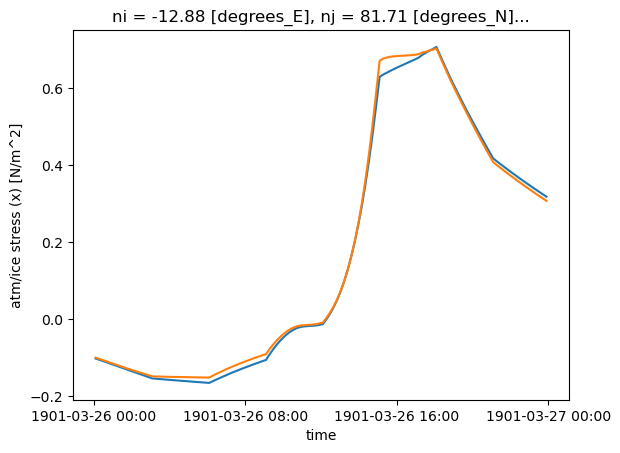

In [27]:
crash_point.strairx_1.plot()
crash_point.strairxE_1.plot()

In [28]:
ocn_cpl_files = ! ls archive/output000/access-om3.cpl.hi.ocn*

In [29]:
ocn_cpl_ds = xr.open_mfdataset(ocn_cpl_files)

In [30]:
ocn_crash_point = ocn_cpl_ds.isel(ocnExp_nx=1068,ocnExp_ny=1001, ocnImp_nx=1068,ocnImp_ny=1001)

In [31]:
crash_point

<xarray.Dataset> Size: 69kB
Dimensions:      (time: 128, nbnd: 2, nkice: 4, nksnow: 1, nkbio: 3, nkaer: 5,
                  nc: 5)
Coordinates:
  * time         (time) object 1kB 1901-03-26 00:05:37.500000 ... 1901-03-26 ...
    NCAT         (nc) float64 40B dask.array<chunksize=(5,), meta=np.ndarray>
    ni           float64 8B -12.88
    nj           float64 8B 81.71
    geolon_t     float32 4B ...
    geolat_t     float32 4B ...
Dimensions without coordinates: nbnd, nkice, nksnow, nkbio, nkaer, nc
Data variables: (12/50)
    time_bounds  (time, nbnd) object 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    VGRDi        (time, nkice) float64 4kB dask.array<chunksize=(1, 4), meta=np.ndarray>
    VGRDs        (time, nksnow) float64 1kB dask.array<chunksize=(1, 1), meta=np.ndarray>
    VGRDb        (time, nkbio) float64 3kB dask.array<chunksize=(1, 3), meta=np.ndarray>
    VGRDa        (time, nkaer) float64 5kB dask.array<chunksize=(1, 5), meta=np.ndarray>
    blkmask      (time) float64 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    ...           ...
    dvidtd_1     (time) float64 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    dvirdgdt_1   (time) float64 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    aicen_1      (time, nc) float64 5kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    dvirdgndt_1  (time, nc) float64 5kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    TLON         float32 4B ...
    TLAT         float32 4B ...
Attributes:
    title:               access-om3
    contents:            Diagnostic and Prognostic Variables
    source:              CICE Sea Ice Model, unknown_version_name
    comment:             All years have exactly 365 days
    comment2:            File written on model date 19010326
    comment3:            seconds elapsed into model date:    675
    time_period_freq:    step_1
    time_axis_position:  middle
    conventions:         CF-1.0
    history:             This dataset was created on 2024-12-03 at 14:12
    io_flavor:           io_pio2 hdf5

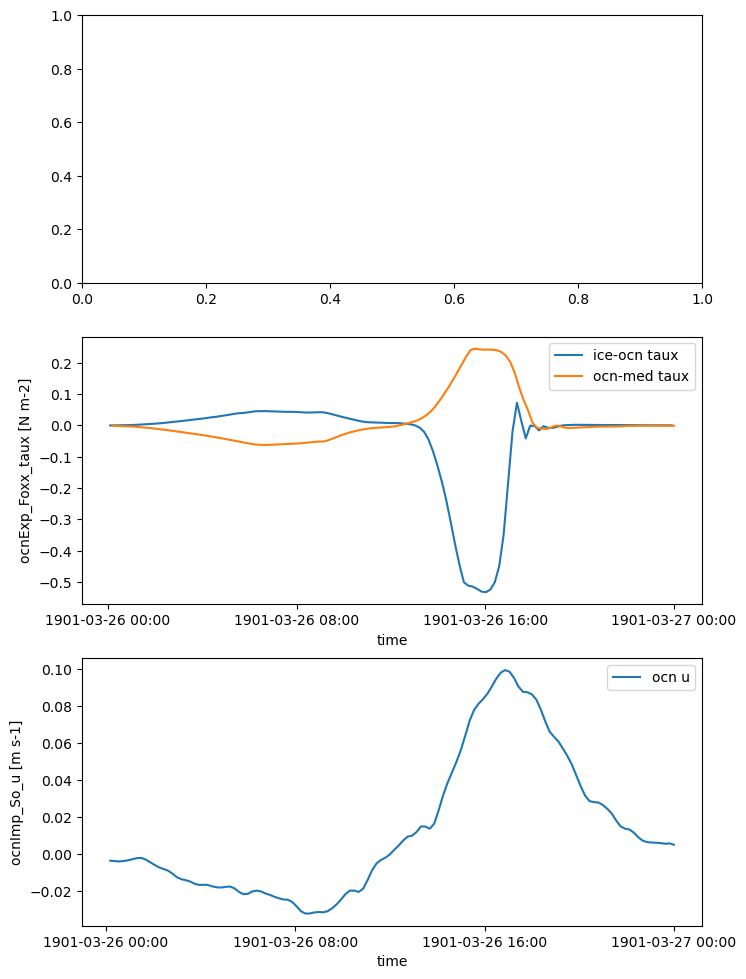

In [32]:
plt.figure(figsize=(8,16))
plt.subplot(4,1,1)
# crash_point.iceExp_Sa_u.plot()
plt.subplot(4,1,2)
# crash_point.iceImp_Faii_taux.plot()
crash_point.strocnxE_1.plot(label='ice-ocn taux')
# plt.subplot(4,1,3)
ocn_crash_point.ocnExp_Foxx_taux.plot(label='ocn-med taux')
plt.legend()
plt.subplot(4,1,3)
ocn_crash_point.ocnImp_So_u.plot(label='ocn u')
plt.legend()
# plt.subplot(5,1,5)
# ocn_crash_point.ocn